In [316]:
%load_ext autoreload
%autoreload 2


import psyplot.project as psy
import psyplot
from psy_maps.plotters import FieldPlotter
import netCDF4
import glob
import xarray as xr
import matplotlib as mpl
from netCDF4 import Dataset
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from stats import *


%matplotlib inline
%config InlineBackend.close_figures = False


print("import ok")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
import ok


In [325]:
reso = "low"

data_path = "/gpfsdswork/dataset/ClimSim_low-res/train/"
filelist = [data_path + '0008-02/E3SM-MMF.mli.0008-02-0'+str(i)+'-00000.nc' for i in range(1, 10, 1)]
grid = 'scvt/ClimSim_low-res_grid-info.nc'
grid_b = '../data/nc_data/grid_with_boundaries_'+reso + 'res.nc'
nc_file = 'test.nc'
npy_pred = '../data/npy_data/prediction/first_test_prediction.npy'

var = 'ptend_t'

print(filelist)

['/gpfsdswork/dataset/ClimSim_low-res/train/0008-02/E3SM-MMF.mli.0008-02-01-00000.nc', '/gpfsdswork/dataset/ClimSim_low-res/train/0008-02/E3SM-MMF.mli.0008-02-02-00000.nc', '/gpfsdswork/dataset/ClimSim_low-res/train/0008-02/E3SM-MMF.mli.0008-02-03-00000.nc', '/gpfsdswork/dataset/ClimSim_low-res/train/0008-02/E3SM-MMF.mli.0008-02-04-00000.nc', '/gpfsdswork/dataset/ClimSim_low-res/train/0008-02/E3SM-MMF.mli.0008-02-05-00000.nc', '/gpfsdswork/dataset/ClimSim_low-res/train/0008-02/E3SM-MMF.mli.0008-02-06-00000.nc', '/gpfsdswork/dataset/ClimSim_low-res/train/0008-02/E3SM-MMF.mli.0008-02-07-00000.nc', '/gpfsdswork/dataset/ClimSim_low-res/train/0008-02/E3SM-MMF.mli.0008-02-08-00000.nc', '/gpfsdswork/dataset/ClimSim_low-res/train/0008-02/E3SM-MMF.mli.0008-02-09-00000.nc']


In [333]:
In, Out = load_ncfiles(filelist, grid_b)

Out.to_netcdf("Out.nc")

<xarray.Dataset>
Dimensions:     (ncol: 384, lev: 60, nvertex: 10)
Coordinates:
    lat         (ncol) float64 ...
    lon         (ncol) float64 ...
  * lev         (lev) float64 0.0 1.0 2.0 3.0 4.0 ... 55.0 56.0 57.0 58.0 59.0
    bounds_lat  (ncol, nvertex) float64 ...
    bounds_lon  (ncol, nvertex) float64 ...
Dimensions without coordinates: ncol, nvertex
Data variables:
    P0          float64 ...
    area        (ncol) float64 ...
Attributes:
    description:  test_climsim
9


In [334]:
pred = npy_toxarray(npy_pred, grid_b)

pred.to_netcdf("pred.nc")

2


In [335]:
pred


<xarray.Dataset>
Dimensions:         (ncol: 384, lev: 60, nvertex: 10, time_counter: 2)
Coordinates:
  * ncol            (ncol) int64 0 1 2 3 4 5 6 7 ... 377 378 379 380 381 382 383
    lat             (ncol) float64 -32.59 -35.99 -22.69 ... 45.34 45.34 40.39
    lon             (ncol) float64 320.3 331.5 320.4 331.7 ... 123.3 146.7 135.0
  * lev             (lev) float64 0.0 1.0 2.0 3.0 4.0 ... 56.0 57.0 58.0 59.0
    bounds_lat      (ncol, nvertex) float64 -27.62 -30.57 -38.86 ... 46.52 46.52
    bounds_lon      (ncol, nvertex) float64 -35.02 -32.58 -36.32 ... 137.6 137.6
  * time_counter    (time_counter) int64 0 1
Dimensions without coordinates: nvertex
Data variables:
    P0              float64 ...
    area            (ncol) float64 0.02745 0.0307 0.0307 ... 0.0307 0.02745
    ptend_t         (time_counter, lev, ncol) float32 -0.002112 ... -0.1103
    ptend_q0001     (time_counter, lev, ncol) float32 0.04381 ... 0.07912
    cam_out_NETSW   (time_counter, ncol) float32 0.0 0.0 0.0 ... 0.7747 0.8216
    cam_out_FLWDS   (time_counter, ncol) float32 1.709 1.498 ... 0.7388 0.7643
    cam_out_PRECSC  (time_counter, ncol) float32 0.01203 0.02191 ... 0.1376
    cam_out_PRECC   (time_counter, ncol) float32 0.0 0.00314 ... 0.01891
    cam_out_SOLS    (time_counter, ncol) float32 0.0 0.0 0.0 ... 1.002 1.04
    cam_out_SOLL    (time_counter, ncol) float32 0.0 0.01261 0.0 ... 1.2 1.237
    cam_out_SOLSD   (time_counter, ncol) float32 0.0 0.01934 ... 0.2821 0.2888
    cam_out_SOLLD   (time_counter, ncol) float32 0.0 0.0 0.0 ... 0.1688 0.1784
Attributes:
    description:  test_climsim

In [336]:
Out


<xarray.Dataset>
Dimensions:         (lev: 60, ncol: 384, nvertex: 10, time_counter: 9)
Coordinates:
  * lev             (lev) float64 0.0 1.0 2.0 3.0 4.0 ... 56.0 57.0 58.0 59.0
    lat             (ncol) float64 ...
    lon             (ncol) float64 ...
    bounds_lat      (ncol, nvertex) float64 ...
    bounds_lon      (ncol, nvertex) float64 ...
  * time_counter    (time_counter) int64 0 1 2 3 4 5 6 7 8
Dimensions without coordinates: ncol, nvertex
Data variables: (12/20)
    P0              float64 ...
    area            (ncol) float64 ...
    ymd             (time_counter) int32 80201 80202 80203 ... 80207 80208 80209
    tod             (time_counter) int32 0 0 0 0 0 0 0 0 0
    cam_out_FLWDS   (time_counter, ncol) float64 374.3 369.0 ... 213.6 228.5
    cam_out_NETSW   (time_counter, ncol) float64 0.0 0.0 0.0 ... 301.9 337.3
    ...              ...
    state_q0003     (time_counter, lev, ncol) float64 1.305e-11 ... 4.136e-24
    state_t         (time_counter, lev, ncol) float64 213.0 212.9 ... 271.3
    state_u         (time_counter, lev, ncol) float64 -79.4 -82.03 ... 5.425
    state_v         (time_counter, lev, ncol) float64 19.16 13.94 ... -0.5212
    ptend_t         (time_counter, lev, ncol) float64 -1.36e-05 ... -8.255e-05
    ptend_q0001     (time_counter, lev, ncol) float64 0.0 0.0 ... 3.236e-08
Attributes:
    description:  test_climsim

In [337]:
psy.rcParams['plotter.maps.xgrid'] = False
psy.rcParams['plotter.maps.ygrid'] = False
mpl.rcParams['figure.figsize'] = [8., 6.]

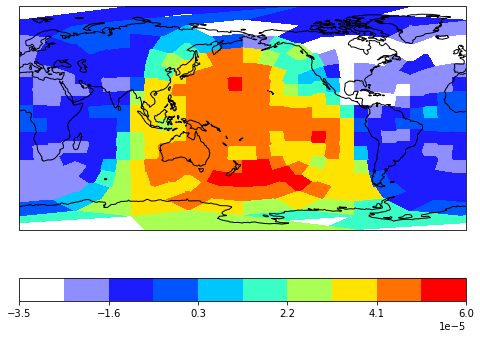

In [338]:
tmap = Out.psy.plot.mapplot( name=var, time_counter = 0)

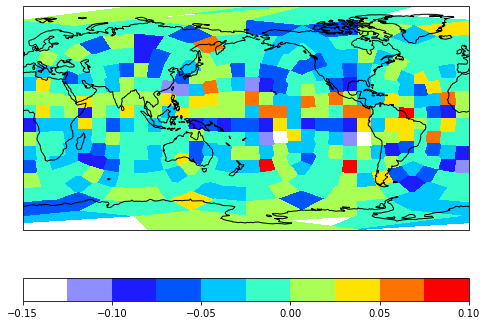

In [339]:
tma = pred.psy.plot.mapplot(name=var)

In [301]:
mean_t = Out.mean('time_counter', keep_attrs = True)

In [302]:
tmap = mean_t.psy.plot.mapplot(name=var,  lev = 59, cmap = 'bwr')

ValueError: Can only plot 2-dimensional data!